# AutoCorrelation

Calculate autocorrelation measures on time series.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_combined, sim_synaptic_current

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_sims
from apm.plts import plot_lines, plot_colorbar
from apm.plts.utils import truncate_colormap

In [3]:
from neurodsp.aperiodic import compute_autocorr

## Settings

In [4]:
# Simulation settings
n_seconds = 10
fs = 1000

# Collect together simulation parameters
sim_params_pow = {'n_seconds' : n_seconds, 'fs' : fs}
sim_params_comb = {'n_seconds' : n_seconds, 'fs' : fs, 
                   'components' : {'sim_powerlaw' : {},
                                   'sim_oscillation' : {'freq' : 10}}, 
                   'component_variances' : [1, 0.25]}

# Settings for autocorrelations
ac_measure_params = {'max_lag' : 250, 'lag_step' : 1}

# Set the number of instances to run
n_instances = 25

# Set the range of exponents to explore
exps = np.arange(-3, 0.5, 0.5)
freqs = np.arange(5, 50, 15)
pows = np.arange(0, 2, 0.5)

# Set the colormap for the plots
cmap_name = 'BuGn_r'
cmap_range = (0., 0.75)

In [5]:
# Get the requested colormap & range
cmap = truncate_colormap(plt.get_cmap(cmap_name), *cmap_range)

# Set up the colors for plotting
exp_colors = cmap(np.linspace(0., 1.0, len(exps)))
freq_colors = cmap(np.linspace(0., 1.0, len(freqs)))
pow_colors = cmap(np.linspace(0., 1.0, len(pows)))

In [6]:
# Notebook settings
SAVE_FIG = True

### Helper Functions

In [7]:
def autocorr_wrapper(sig, **kwargs):
    return compute_autocorr(sig, **kwargs)[1]

### Calculating AutoCorrelation on Example Signals

#### Powerlaw Signals

In [8]:
# Set a test exponent value
exp_pl = -2

In [9]:
# Simulate a powerlaw signal
sig_pl = sim_powerlaw(n_seconds, fs, exponent=exp_pl)

In [10]:
# Calculate autocorrelation
times, sig_acs = compute_autocorr(sig_pl, **ac_measure_params)

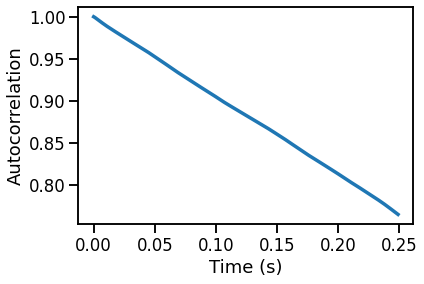

In [11]:
# Plot the autocorrelation across time delays
plot_lines(times/fs, sig_acs)
plot_lines(xlabel='Time (s)', ylabel='Autocorrelation')

#### Powerlaw Signals with a Knee

In [12]:
# Set a test exponent value
exp_kn = -2

In [13]:
# Simulate a signal with a knee
sig_kn = sim_synaptic_current(n_seconds, fs)

In [14]:
# Calculate autocorrelation
times, sig_acs = compute_autocorr(sig_kn, **ac_measure_params)

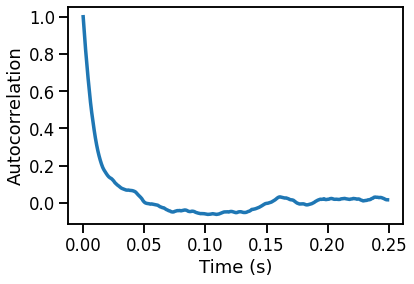

In [15]:
# Plot the autocorrelation across time delays
plot_lines(times/fs, sig_acs)
plot_lines(xlabel='Time (s)', ylabel='Autocorrelation')

## AutoCorrelation Simulations: Aperiodic Variations

### Powerlaw Signals

In [16]:
# Run a set of simulations, calculating autocorrelation across exponents
acs_pow = run_sims(sim_powerlaw, sim_params_pow, autocorr_wrapper, ac_measure_params,
                   update='update_exp', values=exps, n_instances=n_instances)
acs_pow = np.array(acs_pow)

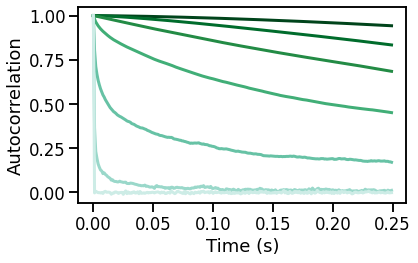

In [17]:
# Plot autocorrelation across exponent values
for ac, color in zip(acs_pow, exp_colors):
    plot_lines(times/fs, ac, color=color, lw=3)
plot_lines(xlabel='Time (s)', ylabel='Autocorrelation')
plot_lines(save_fig=SAVE_FIG, file_name='acs_exp', file_path='autocorr')

### Combined Signals

In [18]:
# Run a set of simulations, calculating autocorrelation across exponents, with an oscillation
acs_osc = run_sims(sim_combined, sim_params_comb, autocorr_wrapper, ac_measure_params,
                   update='update_comb_exp', values=exps, n_instances=n_instances)
acs_osc = np.array(acs_osc)

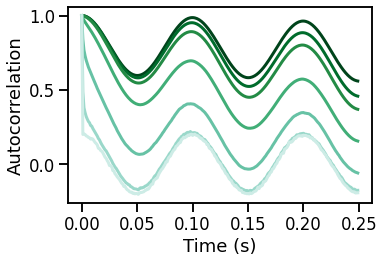

In [19]:
# Plot autocorrelation across exponent values
for ac, color in zip(acs_osc, exp_colors):
    plot_lines(times/fs, ac, color=color, lw=3)
plot_lines(xlabel='Time (s)', ylabel='Autocorrelation')
plot_lines(save_fig=SAVE_FIG, file_name='acs_comb', file_path='autocorr')

## AutoCorrelation Simulations: Periodic Variations

#### Oscillation Frequency

In [20]:
# Run a set of simulations, calculating autocorrelations across oscillation frequency
sims_freq = run_sims(sim_combined, sim_params_comb, autocorr_wrapper, ac_measure_params,
                     update='update_freq', values=freqs, n_instances=n_instances)

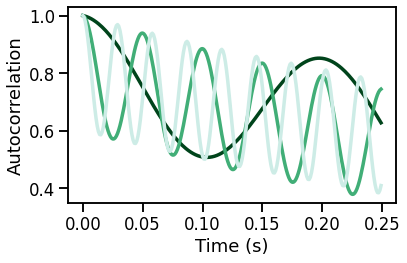

In [21]:
# Plot autocorrelation across exponent values
for ac, color in zip(sims_freq, freq_colors):
    plot_lines(times/fs, ac, color=color)
plot_lines(xlabel='Time (s)', ylabel='Autocorrelation')
plot_lines(save_fig=SAVE_FIG, file_name='acs_osc_freq', file_path='autocorr')

#### Oscillation Power

In [22]:
# Run a set of simulations, calculating autocorrelations across oscillation power
sims_pow = run_sims(sim_combined, sim_params_comb, autocorr_wrapper, ac_measure_params,
                    update='update_pow', values=pows, n_instances=n_instances)

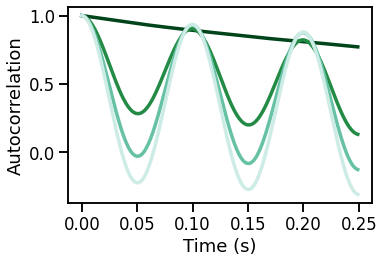

In [23]:
# Plot autocorrelation across exponent values
for ac, color in zip(sims_pow, pow_colors):
    plot_lines(times/fs, ac, color=color)
plot_lines(xlabel='Time (s)', ylabel='Autocorrelation')
plot_lines(save_fig=SAVE_FIG, file_name='acs_osc_pow', file_path='autocorr')

### Create colorbars for the plots

In [24]:
# Make colorbars for the plots
plot_colorbar(cmap, min(exps), max(exps), 'exponent', show=False,
              save_fig=SAVE_FIG, file_name='acs_exp_cbar', file_path='autocorr')

# Make colorbars for the plots
plot_colorbar(cmap, min(freqs), max(freqs), 'frequency', show=False,
              save_fig=SAVE_FIG, file_name='acs_freq_cbar', file_path='autocorr')

# Make colorbars for the plots
plot_colorbar(cmap, min(pows), max(pows), 'power', show=False,
              save_fig=SAVE_FIG, file_name='acs_pow_cbar', file_path='autocorr')